In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import minmax_scale
from sklearn.manifold import TSNE

In [6]:
df = pd.read_csv("data/1.gafgyt.combo.csv")

# chunk = pd.read_csv("data/1.gafgyt.combo.csv", chunksize=100000)
# df = pd.concat(chunk)

In [10]:
df2 = pd.read_csv("data/1.benign.csv")

In [9]:
for column in df.columns:
    print(column)

MI_dir_L5_weight
MI_dir_L5_mean
MI_dir_L5_variance
MI_dir_L3_weight
MI_dir_L3_mean
MI_dir_L3_variance
MI_dir_L1_weight
MI_dir_L1_mean
MI_dir_L1_variance
MI_dir_L0.1_weight
MI_dir_L0.1_mean
MI_dir_L0.1_variance
MI_dir_L0.01_weight
MI_dir_L0.01_mean
MI_dir_L0.01_variance
H_L5_weight
H_L5_mean
H_L5_variance
H_L3_weight
H_L3_mean
H_L3_variance
H_L1_weight
H_L1_mean
H_L1_variance
H_L0.1_weight
H_L0.1_mean
H_L0.1_variance
H_L0.01_weight
H_L0.01_mean
H_L0.01_variance
HH_L5_weight
HH_L5_mean
HH_L5_std
HH_L5_magnitude
HH_L5_radius
HH_L5_covariance
HH_L5_pcc
HH_L3_weight
HH_L3_mean
HH_L3_std
HH_L3_magnitude
HH_L3_radius
HH_L3_covariance
HH_L3_pcc
HH_L1_weight
HH_L1_mean
HH_L1_std
HH_L1_magnitude
HH_L1_radius
HH_L1_covariance
HH_L1_pcc
HH_L0.1_weight
HH_L0.1_mean
HH_L0.1_std
HH_L0.1_magnitude
HH_L0.1_radius
HH_L0.1_covariance
HH_L0.1_pcc
HH_L0.01_weight
HH_L0.01_mean
HH_L0.01_std
HH_L0.01_magnitude
HH_L0.01_radius
HH_L0.01_covariance
HH_L0.01_pcc
HH_jit_L5_weight
HH_jit_L5_mean
HH_jit_L5_variance

In [12]:
# check for missing values
missing_val = df.isna().any()
for value in missing_val:
    if value == True:
        print("Missing Value") # no missing values

## First Family

In [2]:
f1 = pd.read_csv("data/Family1.csv")

In [ ]:
# df1 = f1.drop(columns="Unnamed: 0")

In [10]:
f1.columns

Index(['Unnamed: 0', 'MI_dir_L5_weight', 'MI_dir_L5_mean',
       'MI_dir_L5_variance', 'MI_dir_L3_weight', 'MI_dir_L3_mean',
       'MI_dir_L3_variance', 'MI_dir_L1_weight', 'MI_dir_L1_mean',
       'MI_dir_L1_variance',
       ...
       'HpHp_L0.1_pcc', 'HpHp_L0.01_weight', 'HpHp_L0.01_mean',
       'HpHp_L0.01_std', 'HpHp_L0.01_magnitude', 'HpHp_L0.01_radius',
       'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc', 'Threat_Binary', 'Threat'],
      dtype='object', length=118)

In [ ]:
# chunk = pd.read_csv("data/Family1.csv", chunk = 100000)
# df1 = pd.concat(chunk)

In [9]:
f1[['Threat_Binary', 'Threat']].tail(5)

,Threat_Binary,Threat
1018293,1,10
1018294,1,10
1018295,1,10
1018296,1,10
1018297,1,10


In [11]:
f1.head(5)

,Unnamed: 0,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Threat_Binary,Threat
0,0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0
1,1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0
2,2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,...,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0
3,3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0
4,4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0


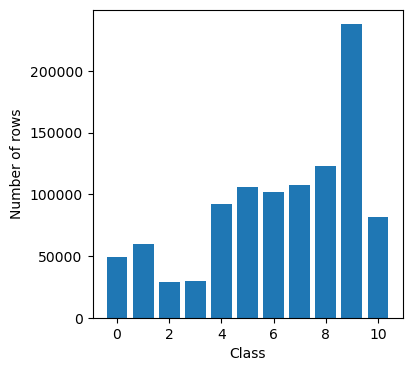

In [51]:
# plot the number of rows
df_rows = pd.DataFrame(f1["Threat"].value_counts().reset_index()) #.sort_index()
plt.figure(figsize=(4,4))
plt.bar(df_rows["index"], df_rows["Threat"])
plt.xlabel("Class")
plt.ylabel("Number of rows")
plt.show()

In [57]:
df_rows

,index,Threat
0,9,237665
1,8,122573
2,7,107685
3,5,105874
4,6,102195
5,4,92141
6,10,81982
7,1,59718
8,0,49548
9,3,29849


In [54]:
# normalize the features
df1 = f1.drop(columns=["Unnamed: 0", "Threat_Binary", "Threat"])
scaled_data1 = minmax_scale(df1)

# Convert the scaled array back to a DataFrame
scaled_df1 = pd.DataFrame(scaled_data1, columns=df1.columns)

# Add the labels
scaled_df1[["Threat", "Threat_Binary"]] = f1[["Threat", "Threat_Binary"]]

In [60]:
scaled_df1.loc[49540:49560,["Threat"]]

,Threat
49540,0
49541,0
49542,0
49543,0
49544,0
49545,0
49546,0
49547,0
49548,1
49549,1


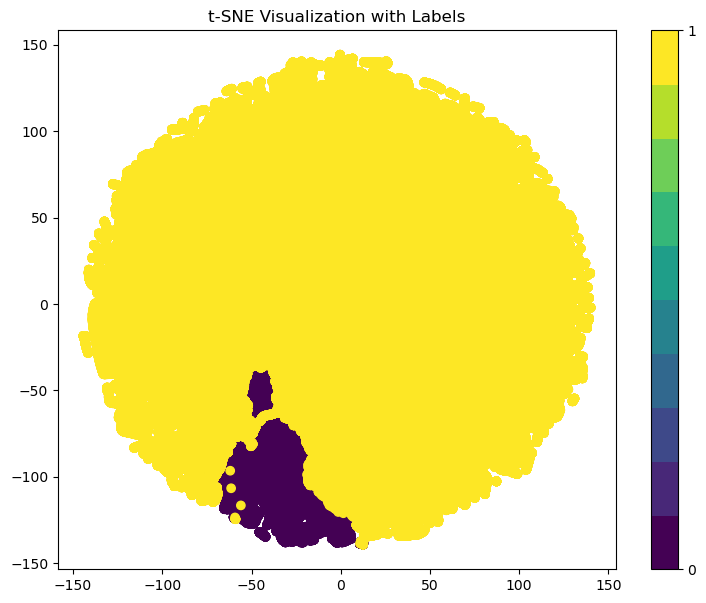

In [75]:
# visualizations with t-sne
X = scaled_df1.drop(columns=["Threat", "Threat_Binary"])
y = scaled_df1["Threat_Binary"]

# apply t-sne
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# plot the graph
plt.figure(figsize=(9,7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap('viridis', 10))  # 11 colors for 11 label values
plt.colorbar(scatter, ticks=np.arange(11))  # Adjust ticks according to the range of your label values
plt.title('t-SNE Visualization with Labels')
plt.show()

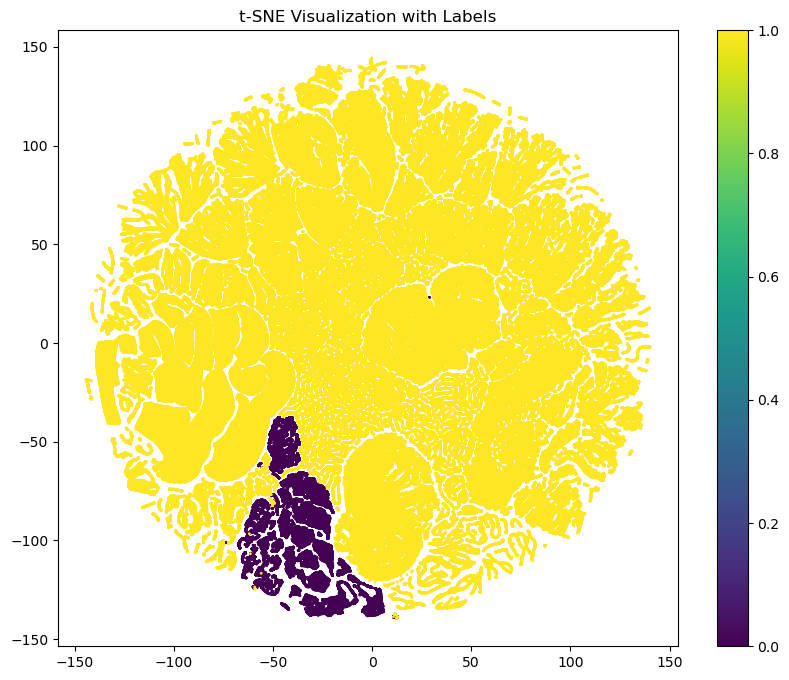

In [78]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=1)  # Set the size to 1
plt.colorbar(scatter)
plt.title('t-SNE Visualization with Labels')
plt.show()

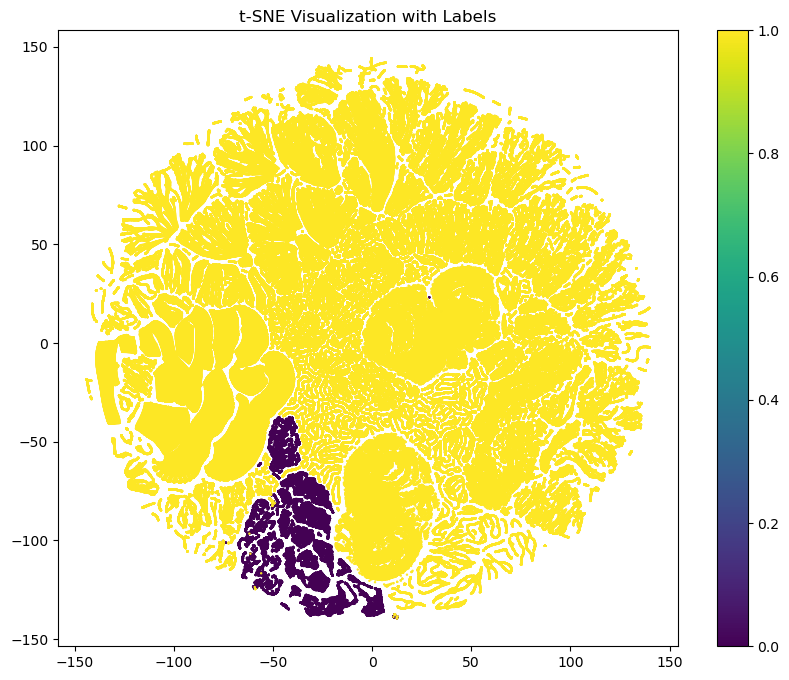

In [79]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=0.5)  # Set the size to 0.5
plt.colorbar(scatter)
plt.title('t-SNE Visualization with Labels')
plt.show()

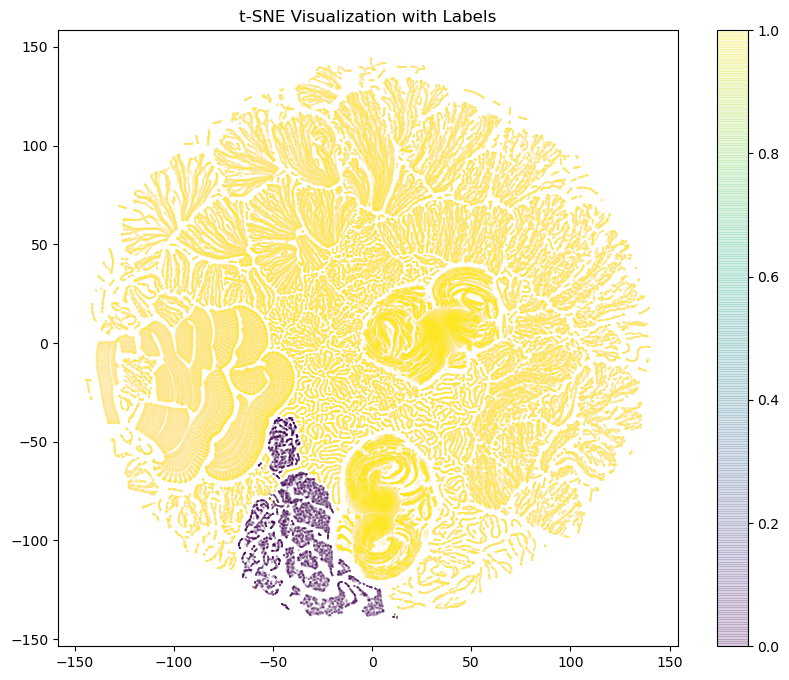

In [83]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=0.01, alpha =0.2)  # Set the size to 0.1
plt.colorbar(scatter)
plt.title('t-SNE Visualization with Labels')
plt.show()

In [85]:
tsne.kl_divergence_

3.281200408935547

# Multiclass Labels
With 2 different alpha values for the shade of the points

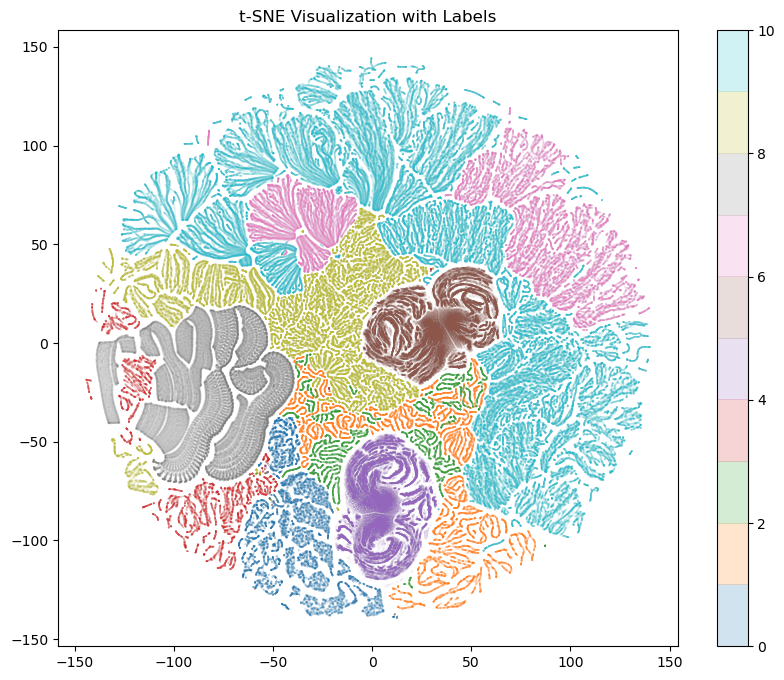

In [87]:
new_y = scaled_df1["Threat"]
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=new_y, cmap='tab10', 
                      s=0.01, alpha =0.2)  # Set the size to 0.1
plt.colorbar(scatter)
plt.title('t-SNE Visualization with Labels')
plt.show()

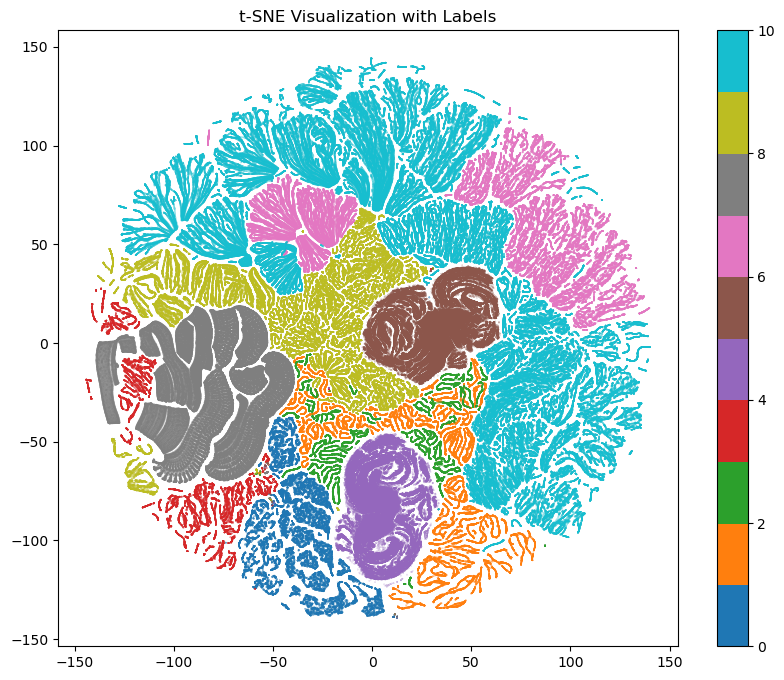

In [88]:
new_y = scaled_df1["Threat"]
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=new_y, cmap='tab10', s=0.01)  # Set the size to 0.1
plt.colorbar(scatter)
plt.title('t-SNE Visualization with Labels')
plt.show()